In [1]:
!pip install mysql-connector-python
!pip install python-dotenv
!pip install matplotlib
!pip install seaborn

You should consider upgrading via the '/Users/pascal/1_code/master_ids/dwdl_air-quality-traffic/venv/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/Users/pascal/1_code/master_ids/dwdl_air-quality-traffic/venv/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/Users/pascal/1_code/master_ids/dwdl_air-quality-traffic/venv/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/Users/pascal/1_code/master_ids/dwdl_air-quality-traffic/venv/bin/python -m pip install --upgrade pip' command.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import os 
from dotenv import load_dotenv
import mysql.connector
import seaborn as sns

In [3]:
# Load environment variables from .env file
load_dotenv('../.env')
'...' + os.getenv('MYSQL_HOST')[25:]

'...evrb.us-east-1.rds.amazonaws.com'

In [4]:
# Get MySQL credentials from environment variables
host = os.getenv('MYSQL_HOST')
user = os.getenv('MYSQL_USER')
password = os.getenv('MYSQL_PASSWORD')
database = os.getenv('MYSQL_DATABASE')

# Establish the connection
connection = mysql.connector.connect(
    host=host,
    user=user,
    password=password,
    database=database
)

In [5]:
%%time

# query the database
query = """SELECT rr.distance, rr.duration, rr.static_duration, rr.observed as route_observed, aq.param, aq.value, aq.observed as air_quality_observed, aq.route_id
FROM route_request rr
JOIN air_quality aq ON rr.route_id = aq.route_id 
AND DATE_FORMAT(rr.observed, '%Y-%m-%d %H') = DATE_FORMAT(aq.observed, '%Y-%m-%d %H');"""

df = pd.read_sql(query, connection)
df

<timed exec>:7: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.


CPU times: user 104 ms, sys: 14.4 ms, total: 119 ms
Wall time: 6.65 s


,distance,duration,static_duration,route_observed,param,value,air_quality_observed,route_id
0,1194,116,155,2024-04-27 00:00:05,CO,0.32,2024-04-27 00:00:00,Zch_Stampfenbachstrasse
1,1194,116,155,2024-04-27 00:00:29,CO,0.32,2024-04-27 00:00:00,Zch_Stampfenbachstrasse
2,1194,103,155,2024-04-26 00:00:32,CO,0.19,2024-04-26 00:00:00,Zch_Stampfenbachstrasse
3,1194,115,155,2024-04-26 00:32:44,CO,0.19,2024-04-26 00:00:00,Zch_Stampfenbachstrasse
4,1194,117,155,2024-04-28 00:00:06,CO,0.16,2024-04-28 00:00:00,Zch_Stampfenbachstrasse
...,...,...,...,...,...,...,...,...
14913,1433,217,240,2024-05-09 23:00:29,O3,62.90,2024-05-09 23:00:00,Zch_Rosengartenstrasse
14914,1433,221,240,2024-05-09 23:00:25,PM10,11.77,2024-05-09 23:00:00,Zch_Rosengartenstrasse
14915,1433,217,240,2024-05-09 23:00:29,PM10,11.77,2024-05-09 23:00:00,Zch_Rosengartenstrasse
14916,1433,221,240,2024-05-09 23:00:25,PM2.5,9.12,2024-05-09 23:00:00,Zch_Rosengartenstrasse


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14918 entries, 0 to 14917
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   distance              14918 non-null  int64         
 1   duration              14918 non-null  int64         
 2   static_duration       14918 non-null  int64         
 3   route_observed        14918 non-null  datetime64[ns]
 4   param                 14918 non-null  object        
 5   value                 14918 non-null  float64       
 6   air_quality_observed  14918 non-null  datetime64[ns]
 7   route_id              14918 non-null  object        
dtypes: datetime64[ns](2), float64(1), int64(3), object(2)
memory usage: 932.5+ KB


In [7]:
# available air quality params
list(df.param.unique())

['CO', 'SO2', 'NOx', 'NO', 'NO2', 'O3', 'PM10', 'PM2.5']

In [15]:
# available route_ids
list(df.route_id.unique())

['Zch_Stampfenbachstrasse',
 'Zch_Schimmelstrasse',
 'Zch_Heubeeribüel',
 'Zch_Rosengartenstrasse']

In [8]:
# Round the timestamps to the nearest hour
df['route_observed'] = df['route_observed'].dt.round('H')
df['air_quality_observed'] = df['air_quality_observed'].dt.round('H')

# Group the data by route_id, param, and rounded hour
grouped = df.groupby(['route_id', 'param', 'route_observed', 'air_quality_observed']).mean().reset_index()
grouped

/var/folders/3p/zn615dls2gv0xhj_cn94h4_h0000gn/T/ipykernel_33363/873177644.py:2: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['route_observed'] = df['route_observed'].dt.round('H')
/var/folders/3p/zn615dls2gv0xhj_cn94h4_h0000gn/T/ipykernel_33363/873177644.py:3: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['air_quality_observed'] = df['air_quality_observed'].dt.round('H')


,route_id,param,route_observed,air_quality_observed,distance,duration,static_duration,value
0,Zch_Heubeeribüel,NO,2024-04-26 00:00:00,2024-04-26 00:00:00,963.0,146.0,159.0,0.52
1,Zch_Heubeeribüel,NO,2024-04-26 01:00:00,2024-04-26 00:00:00,963.0,146.0,159.0,0.52
2,Zch_Heubeeribüel,NO,2024-04-26 01:00:00,2024-04-26 01:00:00,963.0,147.5,159.0,0.35
3,Zch_Heubeeribüel,NO,2024-04-26 02:00:00,2024-04-26 02:00:00,963.0,148.0,159.0,0.35
4,Zch_Heubeeribüel,NO,2024-04-26 03:00:00,2024-04-26 02:00:00,963.0,146.0,159.0,0.35
...,...,...,...,...,...,...,...,...
8871,Zch_Stampfenbachstrasse,SO2,2024-05-09 19:00:00,2024-05-09 19:00:00,1194.0,147.0,152.5,0.21
8872,Zch_Stampfenbachstrasse,SO2,2024-05-09 20:00:00,2024-05-09 20:00:00,1194.0,144.0,152.0,0.14
8873,Zch_Stampfenbachstrasse,SO2,2024-05-09 21:00:00,2024-05-09 21:00:00,1194.0,133.5,152.0,0.21
8874,Zch_Stampfenbachstrasse,SO2,2024-05-09 22:00:00,2024-05-09 22:00:00,1194.0,140.5,152.0,0.15


# travel time

In [11]:
grouped['velocity_ms'] = grouped.duration / grouped.distance
grouped

,route_id,param,route_observed,air_quality_observed,distance,duration,static_duration,value,velocity_ms
0,Zch_Heubeeribüel,NO,2024-04-26 00:00:00,2024-04-26 00:00:00,963.0,146.0,159.0,0.52,0.151610
1,Zch_Heubeeribüel,NO,2024-04-26 01:00:00,2024-04-26 00:00:00,963.0,146.0,159.0,0.52,0.151610
2,Zch_Heubeeribüel,NO,2024-04-26 01:00:00,2024-04-26 01:00:00,963.0,147.5,159.0,0.35,0.153167
3,Zch_Heubeeribüel,NO,2024-04-26 02:00:00,2024-04-26 02:00:00,963.0,148.0,159.0,0.35,0.153686
4,Zch_Heubeeribüel,NO,2024-04-26 03:00:00,2024-04-26 02:00:00,963.0,146.0,159.0,0.35,0.151610
...,...,...,...,...,...,...,...,...,...
8871,Zch_Stampfenbachstrasse,SO2,2024-05-09 19:00:00,2024-05-09 19:00:00,1194.0,147.0,152.5,0.21,0.123116
8872,Zch_Stampfenbachstrasse,SO2,2024-05-09 20:00:00,2024-05-09 20:00:00,1194.0,144.0,152.0,0.14,0.120603
8873,Zch_Stampfenbachstrasse,SO2,2024-05-09 21:00:00,2024-05-09 21:00:00,1194.0,133.5,152.0,0.21,0.111809
8874,Zch_Stampfenbachstrasse,SO2,2024-05-09 22:00:00,2024-05-09 22:00:00,1194.0,140.5,152.0,0.15,0.117672


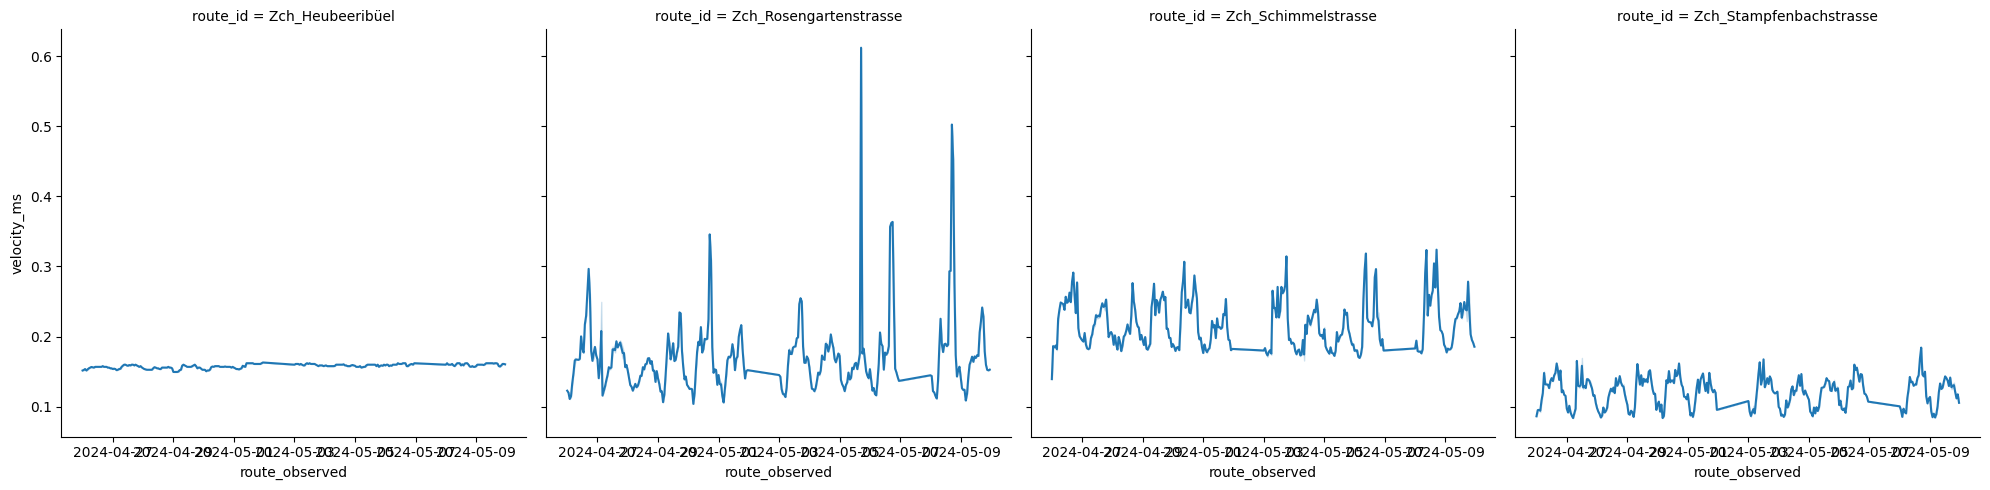

In [12]:
# relative travel time
sns.relplot(
    data=grouped,
    y='velocity_ms',
    x='route_observed',
    col='route_id',
    kind='line'
);

# air quality measurements

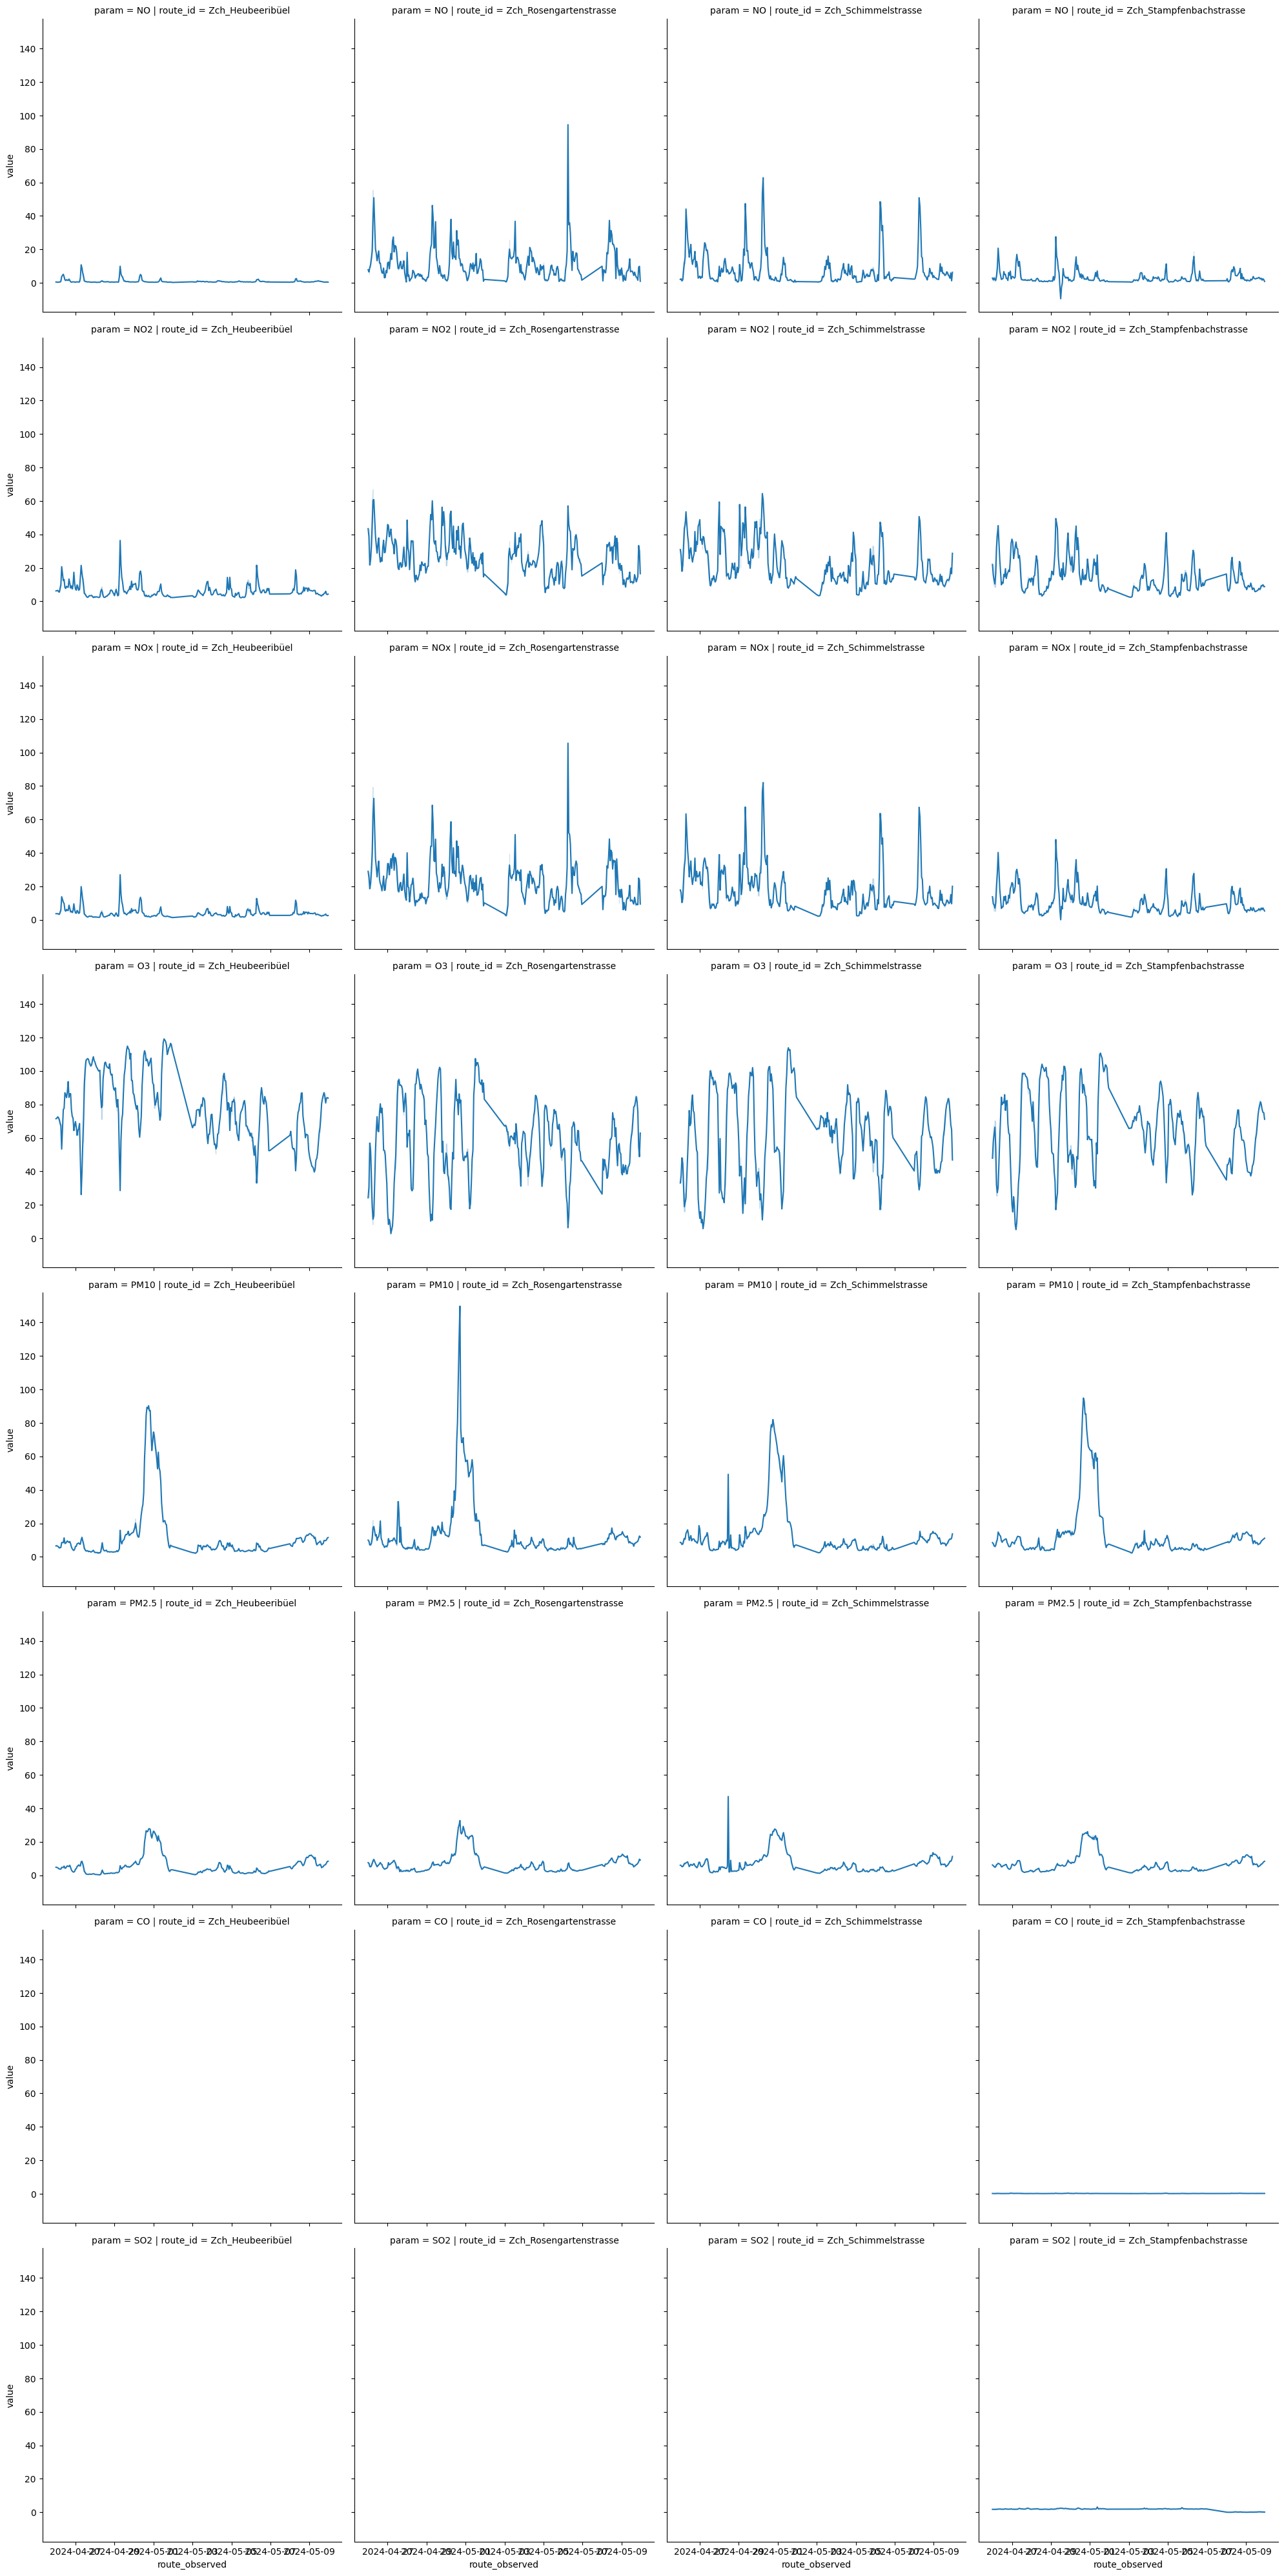

In [13]:
sns.relplot(
    data=grouped,
    y='value',
    x='route_observed',
    col='route_id',
    row='param',
    kind='line'
)